# PROYECTO DE ML. BRAIN TUMOR 

## DATASET  E INFORMACIÓN

Dataset procedente de Kaggle : https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri


Información de tumores cerebrales a nivel mundial : https://gco.iarc.fr/today/data/factsheets/cancers/31-Brain-central-nervous-system-fact-sheet.pdf

## DESCARGA DE LIBRERIAS

In [1]:
from tensorflow.keras.metrics import Recall,Precision
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
import pandas as pd
import seaborn as sns
import itertools
from tensorflow.keras.metrics import Recall,Precision


#SKLEARN
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
 
from sklearn.utils import shuffle 

from tensorflow.keras.utils import to_categorical

#CV2
import cv2

#KERAS
import keras

from keras import regularizers
from keras import optimizers
from keras import metrics

from keras.models import Sequential,Input,Model

from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D, MaxPool2D

from keras.layers.normalization import BatchNormalization

from keras.layers.advanced_activations import LeakyReLU

from keras.utils.np_utils import to_categorical 

from keras.optimizers import RMSprop,Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from keras.applications import MobileNetV2
from keras.layers import Dense # neural network layer
from keras.preprocessing import image # data processing; images
import tensorflow as tf # machine learning; deep learning
import tensorflow.keras.layers as layers # model building
from keras.layers import Input, Dense, Concatenate, Conv2D,BatchNormalization, Activation
from keras.models import Model
from keras.applications import VGG16
from keras.models import load_model

from keras.applications import MobileNetV2
from keras.layers import Dense # neural network layer
from keras.preprocessing import image # data processing; images
import tensorflow as tf # machine learning; deep learning
import tensorflow.keras.layers as layers # model building
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from PIL import Image

## TRABAJAR CON DRIVE EN COLAB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## DESCARGA DE IMÁGENES, REDIMENSIÓN , ETIQUETADO Y DIVISIÓN EN TRAIN, VALIDATION Y TEST

### CARACTERÍSTICAS DE LAS IMÁGENES

In [2]:
width = 200
height = 200
channel = 3
image_size = (width, height)

### IMÁGENES TUMOR SI Y NO

In [ ]:
# DESCARGA DE IMÁGENES
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/IMAGENES SI NO/BRAIN TUMOR SINO')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, image_size)
            #image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))


leyendo imagenes de  /content/drive/MyDrive/IMAGENES SI NO/BRAIN TUMOR SINO/
leyendo imagenes de  /content/drive/MyDrive/IMAGENES SI NO/BRAIN TUMOR SINO/
/content/drive/MyDrive/IMAGENES SI NO/BRAIN TUMOR SINO/si_tumor 1
/content/drive/MyDrive/IMAGENES SI NO/BRAIN TUMOR SINO/no_tumor 496
Directorios leidos: 2
Imagenes en cada directorio [497, 394]
suma Total de imagenes en subdirs: 891


In [ ]:
# ETIQUETADO DE LAS IMÁGENES

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
tumores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    tumores.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype='float32') #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Número de etiquetas : ', nClasses)
print('etiquetas : ', classes)

Cantidad etiquetas creadas:  891
0 si_tumor
1 no_tumor
Número de etiquetas :  2
etiquetas :  [0 1]


In [ ]:
#DIVISIÓN EN TRAIN, VALIDATION Y TEST

X,y = shuffle(X,y)

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.3)

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

train_X,valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=32)

print(train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape)

np.savez('imagen_sino.npz', train_X = train_X,valid_X=valid_X,train_Y=train_Y,valid_Y=valid_Y,test_Y=test_Y,test_X = test_X )

Training data shape :  (623, 200, 200, 3) (623,)
Testing data shape :  (268, 200, 200, 3) (268,)
(498, 200, 200, 3) (125, 200, 200, 3) (498,) (125,)


In [ ]:
#LECTURA

data_tumor_sino_c = np.load('/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/npz/imagen_sino.npz')
train_X = data_tumor_sino_c ['train_X']
valid_X = data_tumor_sino_c ['valid_X']
train_Y = data_tumor_sino_c ['train_Y']
valid_Y = data_tumor_sino_c ['valid_Y']
test_Y =data_tumor_sino_c ['test_Y']
test_X= data_tumor_sino_c ['test_X']

### IMÁGENES PARA CLASIFICACIÓN : PITUITARIA, MENGIOMA Y GLIOMA

In [ ]:
# DESCARGA DE IMÁGENES

import cv2
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/TIPO TUMOR')

imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, image_size)
            #image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/TIPO TUMOR/
leyendo imagenes de  /content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/TIPO TUMOR/
/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/TIPO TUMOR/pituitary_tumor 1
/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/TIPO TUMOR/glioma_tumor 901
/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/TIPO TUMOR/meningioma_tumor 926
Directorios leidos: 3
Imagenes en cada directorio [902, 926, 936]
suma Total de imagenes en subdirs: 2764


In [ ]:
# ETIQUETADO DE LAS IMÁGENES

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))
 
tumores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    tumores.append(name[len(name)-1])
    indice=indice+1
 
y = np.array(labels)
X = np.array(images, dtype='float32') #convierto de lista a numpy
 
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Número de etiquetas : ', nClasses)
print('etiquetas : ', classes)

Cantidad etiquetas creadas:  2764
0 pituitary_tumor
1 glioma_tumor
2 meningioma_tumor
Número de etiquetas :  3
etiquetas :  [0 1 2]


In [ ]:
#DIVISIÓN EN TRAIN, VALIDATION Y TEST

X,y = shuffle(X,y)
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.3)

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=32)

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

np.savez('data_Color.npz', train_X = train_X,valid_X=valid_X,train_label=train_label,valid_label=valid_label,test_Y_one_hot=test_Y_one_hot,test_X = test_X )



Training data shape :  (1934, 200, 200, 3) (1934,)
Testing data shape :  (830, 200, 200, 3) (830,)
Original label: 2
After conversion to one-hot: [0. 0. 1.]
(1547, 200, 200, 3) (387, 200, 200, 3) (1547, 3) (387, 3)


In [ ]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/npz/data_Color (1).npz')
sorted(data.files)

['test_X',
 'test_Y_one_hot',
 'train_X',
 'train_label',
 'valid_X',
 'valid_label']

In [ ]:
#LECTURA


train_X_c = data['train_X']
valid_X_c = data['valid_X']
train_label_c = data['train_label']
valid_label_c = data['valid_label']
test_Y_one_hot_c=data['test_Y_one_hot']
test_X_c= data['test_X']

### EJEMPLO DE IMÁGENES

926
875
977
131
47
1162
748
526
437
73
1243
1146


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


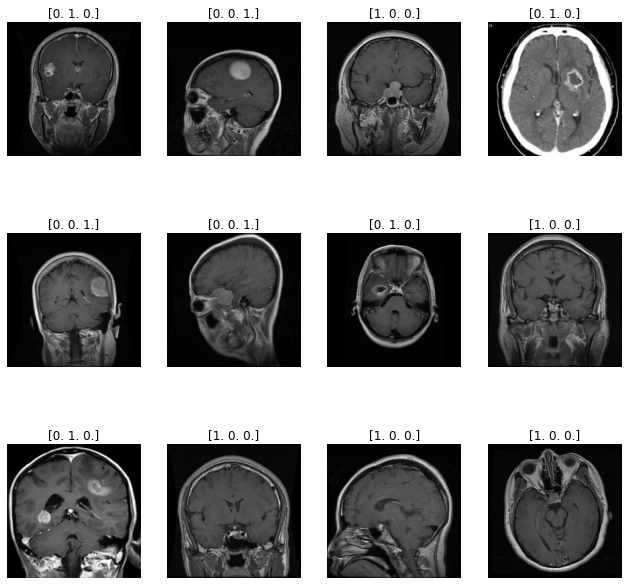

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(11,11))

for row in ax :
  for col in row:
    img_idx = random.randint (0, train_X_c.shape[0]-1)
    print(img_idx)
    img = train_X_c [img_idx]
    col.imshow(img)
    col.set_title(train_label_c [img_idx])
    col.set_axis_off()
plt.show();

## FUNCIONES

### PARA MODELO 1 | TUMOR SI TUMOR NO


In [ ]:
def modelos_sn (name, epochs , batch_size, model):
  
  nombre = str(name)+'.h5'
  callbacks_model = 'callbacks_'+nombre
  early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,
                                                 restore_best_weights=True)
  checkpoint_cb = keras.callbacks.ModelCheckpoint(callbacks_model)
  
  ### ENTRENAMIENTO
  tumores_train_dropout_sn = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y),callbacks = [checkpoint_cb, early_stopping_cb])
 
  ### EVALUACIÓN
  test_eval = model.evaluate(test_X, test_Y, verbose=1)

  print('Test loss:', test_eval[0])
  print('Test accuracy:', test_eval[1])

  #### GUARDAR EL MODELO
  
  model.save(nombre)

  plt.figure(0)
  plt.plot(tumores_train_dropout_sn.history['binary_accuracy'], 'orange')
  plt.plot(tumores_train_dropout_sn.history['val_binary_accuracy'], 'blue')
  plt.xlabel('n_epochs')
  plt.ylabel('acc');

  nombre = str(name)+'_binary_accuracy.jpg'

  plt.savefig(nombre )

  plt.figure(1)
  plt.plot(tumores_train_dropout_sn.history['loss'], 'orange')
  plt.plot(tumores_train_dropout_sn.history['val_loss'], 'blue')
  plt.xlabel('n_epochs')
  plt.ylabel('loss');

  nombre = str(name)+'_loss.jpg'

  plt.savefig(nombre )

  

### PARA MODELO 2 | CLASIFICACIÓN TIPO

In [ ]:
def modelos (name, epochs , batch_size, model):
  
  nombre = str(name)+'.h5'
  callbacks_model = 'callbacks_'+nombre
  early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5,
                                                 restore_best_weights=True)
  checkpoint_cb = keras.callbacks.ModelCheckpoint(callbacks_model)
  
  ### ENTRENAMIENTO
  tumores_train_dropout = model.fit(train_X_c, train_label_c, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X_c, valid_label_c),callbacks = [checkpoint_cb, early_stopping_cb])
   
  test_eval = model.evaluate(test_X_c, test_Y_one_hot_c, verbose=1)

  print('Test loss:', test_eval[0])
  print('Test accuracy:', test_eval[1])
   

  #### GUARDAR EL MODELO
  
  model.save(nombre)

  plt.figure(0)
  plt.plot(tumores_train_dropout.history['accuracy'], 'orange')
  plt.plot(tumores_train_dropout.history['val_accuracy'], 'blue')
  plt.xlabel('n_epochs')
  plt.ylabel('acc');

  nombre = str(name)+'_accuracy.jpg'

  plt.savefig(nombre )

  plt.figure(1)
  plt.plot(tumores_train_dropout.history['loss'], 'orange')
  plt.plot(tumores_train_dropout.history['val_loss'], 'blue')
  plt.xlabel('n_epochs')
  plt.ylabel('loss');

  nombre = str(name)+'_loss.jpg'

  plt.savefig(nombre )

  ### MATRIZ DE CONFUSIÓN
  Y_pred = model.predict(test_X_c, verbose=1)
  y_pred = np.argmax(Y_pred, axis =1)
  cm = confusion_matrix(np.argmax(test_Y_one_hot_c, axis =1), y_pred)
  df_cm = pd.DataFrame(cm, range(4), range(4))
  plt.figure(figsize = (10,7))
  sns.set(font_scale = 1.4)
  sns.heatmap(df_cm, annot = True, fmt = 'g')
  plt.show()

  nombre = str(name)+'_cm.jpg'

  plt.savefig(nombre )

## MODELOS

### MODELOS TIPO 1

 #### MODELOS TIPO 1 | Modelo 1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
preds (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 26s 662ms/step - loss: 0.6944 - binary_accuracy: 0.5879 - val_loss: 0.3903 - val_binary_accuracy: 0.8480
Epoch 2/100
32/32 [==============================] - 20s 627ms/step - loss: 0.37

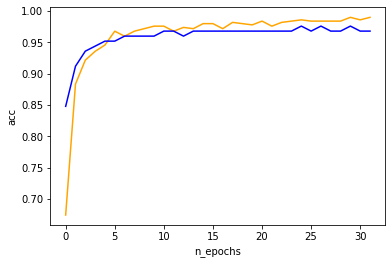

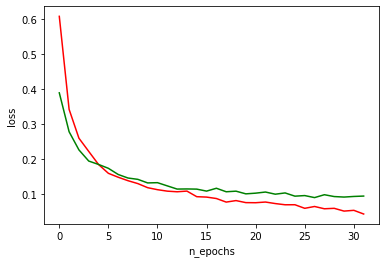

In [ ]:
model = Sequential([
    # base
    MobileNetV2(input_shape=(200, 200, 3),include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid',name='preds'),   
])
model.layers[0].trainable= False
# show model summary

model.summary()

model.compile(
# Set the loss as binary_crossentropy
loss='binary_crossentropy',
# Set the optimizer to Adam
optimizer=keras.optimizers.Adam(epsilon=0.01),
# Set the metric as accuracy
metrics=['binary_accuracy']
)

modelos_sn ('MODELO_1_1', 100 , 16, model)

In [ ]:
# LECTURA DEL MODELO
model = load_model('/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/MODELO_1_1.h5')

In [ ]:
### MATRIZ DE CONFUSIÓN
Y_pred_sn = model.predict(test_X, verbose=1)
Y_pred =Y_pred_sn.round(3)
Y_p= []
for i in Y_pred:
  if i>0.6:
    Y_p.append (1)
  else :
     Y_p.append (0)


9/9 [==============================] - 9s 947ms/step


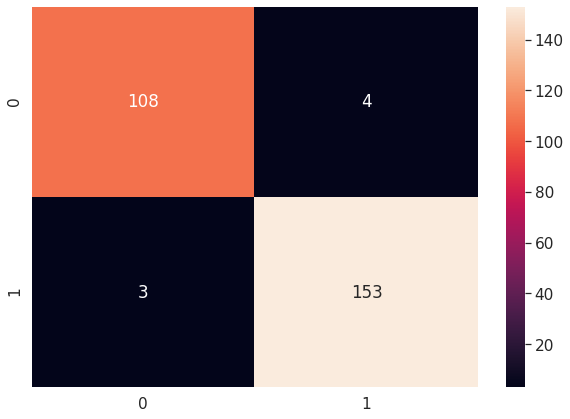

In [ ]:
cm = confusion_matrix(test_Y,  Y_p)
df_cm_sn = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm_sn, annot = True, fmt = 'g')
plt.show()

 #### MODELOS TIPO 1 | Modelo 2

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 9s 175ms/step - loss: 0.7135 - binary_accuracy: 0.5071 - val_loss: 0.6986 - val_binary_accuracy: 0.5440
Epoch 2/200
32/3

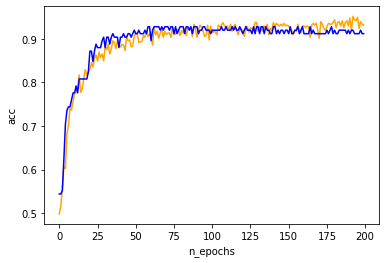

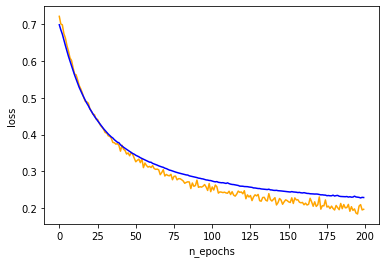

In [ ]:
model = Sequential([
    # base
    VGG16(input_shape=(200, 200, 3),include_top=False),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid'),   
])
model.layers[0].trainable= False
# show model summary

model.summary()

model.compile(
# Set the loss as binary_crossentropy
loss='binary_crossentropy',
# Set the optimizer to Adam
optimizer=keras.optimizers.Adam(epsilon=0.01),
# Set the metric as accuracy
metrics=['binary_accuracy']
)

modelos_sn ('MODELO_1_2', 200 , 16, model)

In [ ]:
# LECTURA DEL MODELO
model = load_model('/Users/cmg/Desktop/BRAIN TUMOR TOTAL/Colab Notebooks/MODELO_1_2.h5')

In [ ]:
### MATRIZ DE CONFUSIÓN
Y_pred_sn = model.predict(test_X, verbose=1)
Y_pred =Y_pred_sn.round(3)
Y_p= []
for i in Y_pred:
  if i>0.6:
    Y_p.append (1)
  else :
     Y_p.append (0)

9/9 [==============================] - 1s 116ms/step


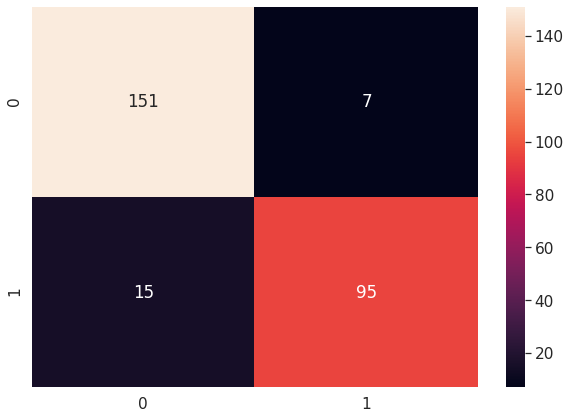

In [ ]:
cm = confusion_matrix(test_Y,  Y_p)
df_cm_sn = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm_sn, annot = True, fmt = 'g')
plt.show()

 #### MODELOS TIPO 1 | Modelo 3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 200, 200, 64)      4864      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 128)      

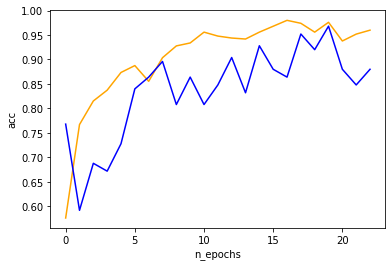

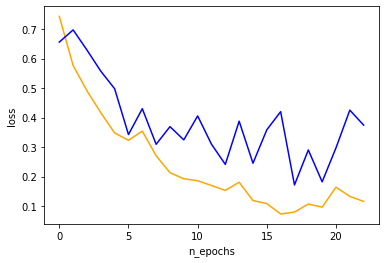

In [ ]:
model = Sequential()

epochs = 100   
batch_size = 40
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (200,200,3)))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

optimizer='adam'
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["binary_accuracy"])

model.summary()


modelos_sn ('MODELO_1_3', 100 , 16, model)

In [ ]:
# LECTURA DEL MODELO
model = load_model('/Users/cmg/Desktop/BRAIN TUMOR TOTAL/Colab Notebooks/MODELO_1_3.h5')

In [ ]:
### GRÁFICAS
plt.figure(0)
plt.plot(model.history['binary_accuracy'], 'orange')
plt.plot(model.history['val_binary_accuracy'], 'blue')
plt.xlabel('n_epochs')
plt.ylabel('acc');

plt.figure(1)
plt.plot(tumores_train_dropout_sn.history['loss'], 'orange')
plt.plot(tumores_train_dropout_sn.history['val_loss'], 'blue')
plt.xlabel('n_epochs')
plt.ylabel('loss');

### MATRIZ DE CONFUSIÓN


y_pred_sn = np.argmax(Y_pred_sn, axis =1)
cm = confusion_matrix(np.argmax(test_Y, axis =1), y_pred_sn)
df_cm_sn = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm_sn, annot = True, fmt = 'g')
plt.show()

 #### MODELOS TIPO 1 | Modelo 1 + Generator (0.9627)

In [ ]:
model = Sequential([
    # base
    MobileNetV2(input_shape=(200, 200, 3),include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid',name='preds'),   
])
model.layers[0].trainable= False
# show model summary

model.summary()

model.compile(
# Set the loss as binary_crossentropy
loss='binary_crossentropy',
# Set the optimizer to Adam
optimizer=keras.optimizers.Adam(epsilon=0.01),
# Set the metric as accuracy
metrics=['binary_accuracy']
)

epochs = 32  
batch_size = 40

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False) 

datagen.fit(train_X)
history = model.fit_generator(datagen.flow(train_X,train_Y, batch_size=batch_size),
                              epochs = epochs, validation_data = (valid_X, valid_Y) ,steps_per_epoch = train_X.shape[0] // batch_size)
 #tumores_train_dropout_sn = model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_Y),callbacks = [checkpoint_cb, early_stopping_cb])
 
  ### EVALUACIÓN
test_eval = model.evaluate(test_X, test_Y, verbose=1)
  

   



   

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dropout_88 (Dropout)         (None, 1280)              0         
_________________________________________________________________
preds (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
12/12 [==============================] - 4s 123ms/step - loss: 0.7341 - binary_accuracy: 0.5533 - val_loss: 0.5911 - val_binary_accuracy: 0.7040
Epoch 2/32
12/12 [==============================] - 1s 57ms/step - loss: 0.5738 - binary_accuracy: 0.7153 - val_loss: 0.4629 - val_binary_accuracy: 0.8400
Epoch 3/32
12/12 [==============================] - 1s 57ms/step - loss: 0.4221 - binary_accuracy: 0.8191 - val_loss: 0.3732 - val_binary_accuracy: 0.8960
Epoch 4/32
12/12 [==============================] - 1s 57ms/step - loss: 0.3620 - binary_accuracy: 0.8911 - val_loss: 0.3168 - val_binary_accuracy: 0.9120
Epoch 5/32
12/12 [==============================] - 1s 57ms/step - loss: 0.2878 - binary_accuracy: 0.9298 - val_loss: 0.2762 - val_binary_accuracy: 0.9200
Epoch 6/32
12/12 [==============================] - 1s 55ms/step - loss: 0.2419 - binary_accuracy: 0.9352 - val_loss: 0.2494 - val_binary_accuracy: 0.9280
Epoch 7/32
12/12 [==============================] - 1s 58ms/step - lo

In [ ]:
 model.save('Modelo_1_1_G.h5')

In [ ]:
# LECTURA DEL MODELO
model = load_model('/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/MODELOS/Modelo_1_1_G.h5')

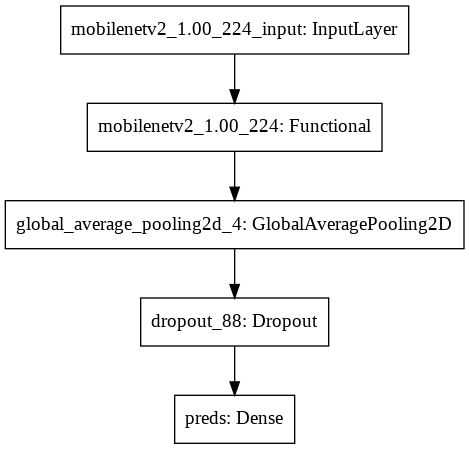

In [ ]:
tf.keras.utils.plot_model(model )

In [ ]:
### MATRIZ DE CONFUSIÓN
Y_pred_sn = model.predict(test_X, verbose=1)
Y_pred =Y_pred_sn.round(3)
Y_p= []
for i in Y_pred:
  if i>0.6:
    Y_p.append (1)
  else :
     Y_p.append (0)


9/9 [==============================] - 33s 66ms/step


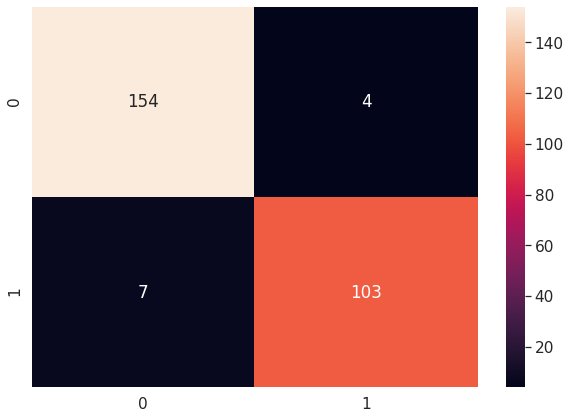

In [ ]:
cm = confusion_matrix(test_Y,  Y_p)
df_cm_sn = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm_sn, annot = True, fmt = 'g')
plt.show()

 #### MODELOS TIPO 1 | Modelo 2

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/200
32/32 [==============================] - 9s 175ms/step - loss: 0.7135 - binary_accuracy: 0.5071 - val_loss: 0.6986 - val_binary_accuracy: 0.5440
Epoch 2/200
32/3

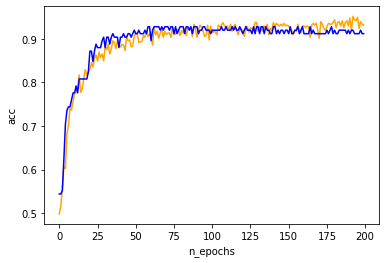

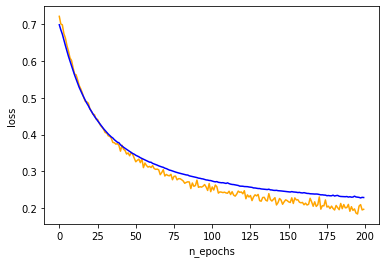

In [ ]:
model = Sequential([
    # base
    VGG16(input_shape=(200, 200, 3),include_top=False),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid'),   
])
model.layers[0].trainable= False
# show model summary

model.summary()

model.compile(
# Set the loss as binary_crossentropy
loss='binary_crossentropy',
# Set the optimizer to Adam
optimizer=keras.optimizers.Adam(epsilon=0.01),
# Set the metric as accuracy
metrics=['binary_accuracy']
)

modelos_sn ('MODELO_1_2', 200 , 16, model)

In [ ]:
# LECTURA DEL MODELO
model = load_model('/Users/cmg/Desktop/BRAIN TUMOR TOTAL/Colab Notebooks/MODELO_1_2.h5')

In [ ]:
### MATRIZ DE CONFUSIÓN
Y_pred_sn = model.predict(test_X, verbose=1)
Y_pred =Y_pred_sn.round(3)
Y_p= []
for i in Y_pred:
  if i>0.6:
    Y_p.append (1)
  else :
     Y_p.append (0)

9/9 [==============================] - 1s 116ms/step


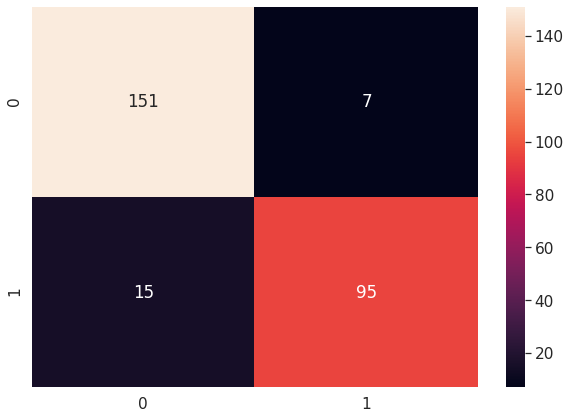

In [ ]:
cm = confusion_matrix(test_Y,  Y_p)
df_cm_sn = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm_sn, annot = True, fmt = 'g')
plt.show()

 #### MODELOS TIPO 1 | Modelo 3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 200, 200, 64)      4864      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 50, 50, 128)      

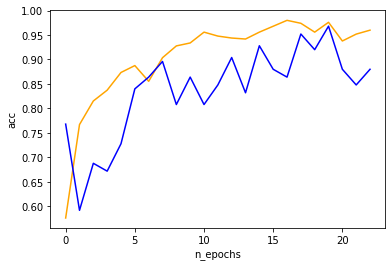

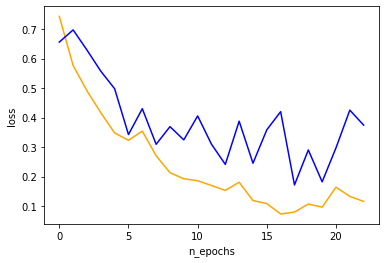

In [ ]:
model = Sequential()

epochs = 100   
batch_size = 40
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (200,200,3)))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

optimizer='adam'
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["binary_accuracy"])

model.summary()


modelos_sn ('MODELO_1_3', 100 , 16, model)

In [ ]:
# LECTURA DEL MODELO
model = load_model('/Users/cmg/Desktop/BRAIN TUMOR TOTAL/Colab Notebooks/MODELO_1_3.h5')

In [ ]:
### GRÁFICAS
plt.figure(0)
plt.plot(model.history['binary_accuracy'], 'orange')
plt.plot(model.history['val_binary_accuracy'], 'blue')
plt.xlabel('n_epochs')
plt.ylabel('acc');

plt.figure(1)
plt.plot(tumores_train_dropout_sn.history['loss'], 'orange')
plt.plot(tumores_train_dropout_sn.history['val_loss'], 'blue')
plt.xlabel('n_epochs')
plt.ylabel('loss');

### MATRIZ DE CONFUSIÓN


y_pred_sn = np.argmax(Y_pred_sn, axis =1)
cm = confusion_matrix(np.argmax(test_Y, axis =1), y_pred_sn)
df_cm_sn = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm_sn, annot = True, fmt = 'g')
plt.show()

### MODELOS TIPO 2

#### MODELOS TIPO 2 | Modelo 1 (0.8831)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 200, 200, 64)      4864      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 128)      

ValueError: ignored

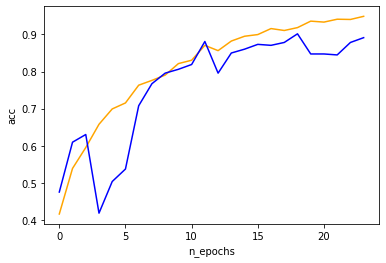

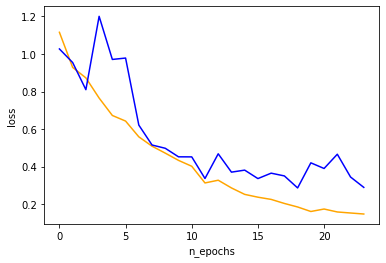

In [ ]:
model = Sequential()

epochs = 100   
batch_size = 40
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (200,200,3)))
#model.add(LeakyReLU(alpha=0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
#model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

optimizer = 'adam' 
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model.summary()

modelos ('MODELO_2_1', epochs , batch_size, model)
 



#### MODELOS TIPO 2 | Modelo 2 (0.8710)


9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 1280)              0         
_________________________________________________________________
preds (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 7s 259ms/step - loss: 1.3168 - accuracy: 0.3572 - val_loss: 0.9627 - val_accuracy: 0.5504
Epoch 2/100
16/16 [=============

ValueError: ignored

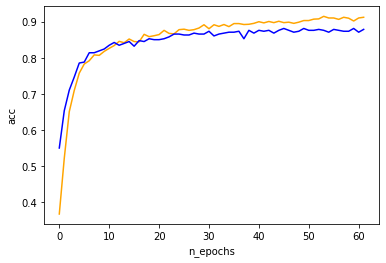

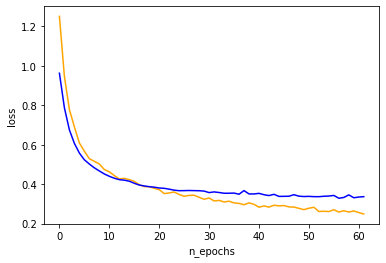

In [ ]:

model = Sequential([
    # base
    MobileNetV2(input_shape=(200, 200, 3),include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=3, activation='softmax',name='preds'),   
])
model.layers[0].trainable= False
# show model summary

model.summary()

model.compile(
# Set the loss as binary_crossentropy
loss="categorical_crossentropy",
# Set the optimizer to Adam
optimizer=keras.optimizers.Adam(epsilon=0.01),
# Set the metric as accuracy
metrics=['accuracy']
)

modelos ('MODELO_2_2', 100 , 100, model)

#### MODELOS TIPO 2 | Modelo 1 + Generator (0.91)

In [ ]:
model = Sequential()

epochs = 50  
batch_size = 40
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (200,200,3)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 140, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

optimizer = 'adam'
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])




epochs = 50  
batch_size = 40
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False) 

datagen.fit(train_X_c)
history = model.fit_generator(datagen.flow(train_X_c,train_label_c, batch_size=batch_size),
                              epochs = epochs, validation_data = (valid_X_c, valid_label_c) ,steps_per_epoch = train_X_c.shape[0] // batch_size)
   

   
test_eval = model.evaluate(test_X_c, test_Y_one_hot_c, verbose=1)


   



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
38/38 [==============================] - 6s 127ms/step - loss: 1.2436 - accuracy: 0.3916 - val_loss: 1.0780 - val_accuracy: 0.6305
Epoch 2/50
38/38 [==============================] - 4s 118ms/step - loss: 0.9844 - accuracy: 0.5020 - val_loss: 0.9723 - val_accuracy: 0.5685
Epoch 3/50
38/38 [==============================] - 4s 118ms/step - loss: 0.8707 - accuracy: 0.6231 - val_loss: 0.9564 - val_accuracy: 0.6047
Epoch 4/50
38/38 [==============================] - 4s 118ms/step - loss: 0.7760 - accuracy: 0.6603 - val_loss: 0.8950 - val_accuracy: 0.5891
Epoch 5/50
38/38 [==============================] - 4s 118ms/step - loss: 0.7280 - accuracy: 0.6768 - val_loss: 0.8940 - val_accuracy: 0.5323
Epoch 6/50
38/38 [==============================] - 4s 117ms/step - loss: 0.6703 - accuracy: 0.7054 - val_loss: 0.8677 - val_accuracy: 0.5607
Epoch 7/50
38/38 [==============================] - 4s 118ms/step - loss: 0.6267 - accuracy: 0.7127 - val_loss: 0.9917 - val_accuracy: 0.5220
Epoch 

In [ ]:
 model.save('Modelo_2_1_G.h5')

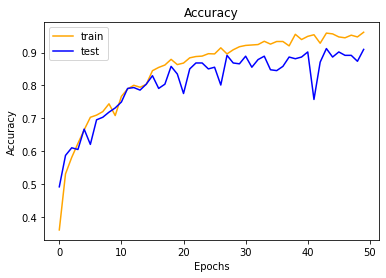

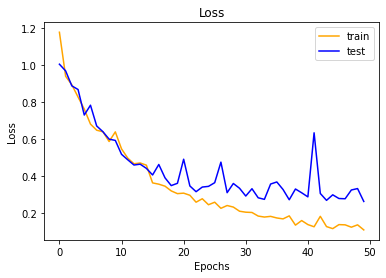

In [ ]:
plt.plot(history.history["accuracy"],c = "orange")
plt.plot(history.history["val_accuracy"],c = "blue")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

plt.plot(history.history["loss"],c = "orange")
plt.plot(history.history["val_loss"],c = "blue")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [ ]:
from PIL import Image 
import PIL 

In [ ]:
# LECTURA DEL MODELO
model = load_model('/content/drive/MyDrive/Colab Notebooks/ML BRAIN TUMOR/MODELOS/Modelo_2_1_G.h5')

In [ ]:
imagen_m = tf.keras.utils.plot_model(model )

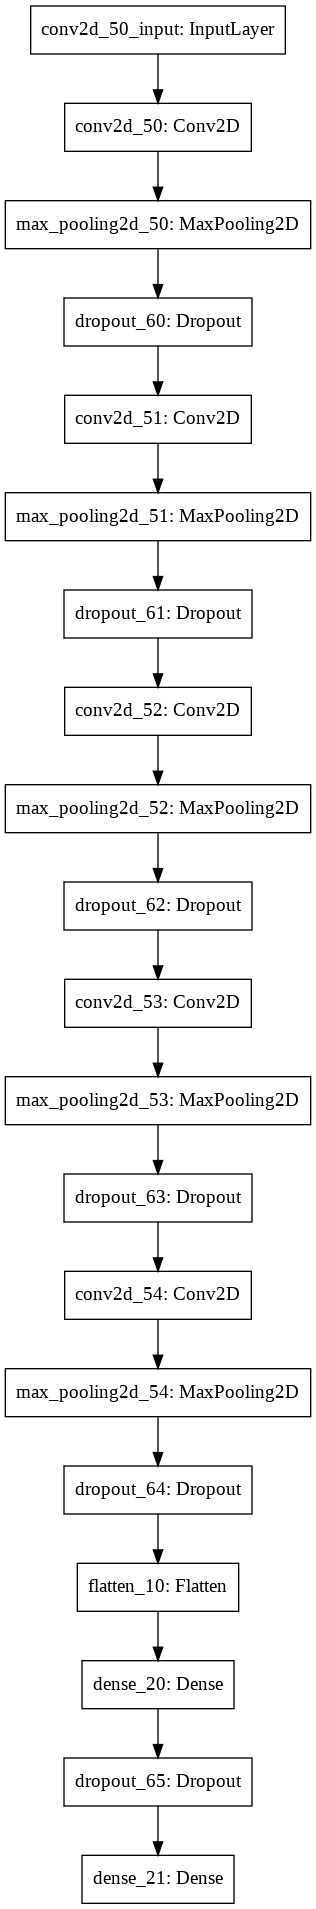

In [ ]:
imagen_m

26/26 [==============================] - 1s 26ms/step


NameError: ignored

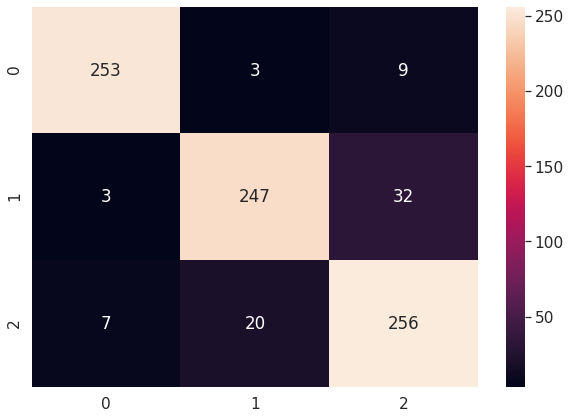

In [ ]:
### MATRIZ DE CONFUSIÓN

Y_pred = model.predict(test_X_c, verbose=1)
y_pred = np.argmax(Y_pred, axis =1)
cm = confusion_matrix(np.argmax(test_Y_one_hot_c, axis =1), y_pred)
df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt = 'g')
ax.set_xticklabels(['hola'] + classes)
ax.set_yticklabels(['hola'] + classes)

plt.show()






#### MODELOS TIPO 2 | Modelo 2 + Generator (0.8783)

In [ ]:
model = Sequential([
    # base
    MobileNetV2(input_shape=(200, 200, 3),include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=3, activation='softmax',name='preds'),   
])
model.layers[0].trainable= False
# show model summary

model.summary()

model.compile(
# Set the loss as binary_crossentropy
loss="categorical_crossentropy",
# Set the optimizer to Adam
optimizer=keras.optimizers.Adam(epsilon=0.01),
# Set the metric as accuracy
metrics=['accuracy']
)

datagen.fit(train_X_c)
history = model.fit_generator(datagen.flow(train_X_c,train_label_c, batch_size=batch_size),
                              epochs = epochs, validation_data = (valid_X_c, valid_label_c) ,steps_per_epoch = train_X_c.shape[0] // batch_size)
   

   
test_eval = model.evaluate(test_X_c, test_Y_one_hot_c, verbose=1)


9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 1280)              0         
_________________________________________________________________
preds (Dense)                (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
38/38 [==============================] - 7s 103ms/step - loss: 1.3460 - accuracy: 0.3415 - val_loss: 0.8178 - val_accuracy: 0.6382
Epoch 2/50
38/38 [==============================] - 2s 56ms/step - loss: 0.7938 - accuracy: 0.6475 - val_loss: 0.6223 - val_accuracy: 0.7519
Epoch 3/50
38/38 [==============================] - 2s 56ms/step - loss: 0.6505 - accuracy: 0.7419 - val_loss: 0.5307 - val_accuracy: 0.7804
Epoch 4/50
38/38 [==============================] - 2s 56ms/step - loss: 0.5538 - accuracy: 0.8016 - val_loss: 0.4958 - val_accuracy: 0.8191
Epoch 5/50
38/38 [==============================] - 2s 56ms/step - loss: 0.5017 - accuracy: 0.8216 - val_loss: 0.4606 - val_accuracy: 0.8114
Epoch 6/50
38/38 [==============================] - 2s 57ms/step - loss: 0.4528 - accuracy: 0.8303 - val_loss: 0.4456 - val_accuracy: 0.8398
Epoch 7/50
38/38 [==============================] - 2s 56ms/step - loss: 0.4565 - accuracy: 0.8183 - val_loss: 0.4207 - val_accuracy: 0.8450
Epoch 8/50
3

In [ ]:
 model.save('Modelo_2_2_G.h5')

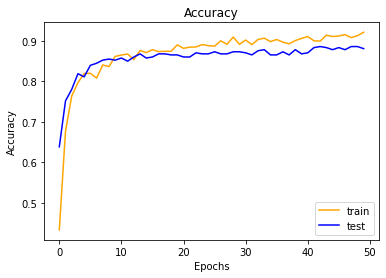

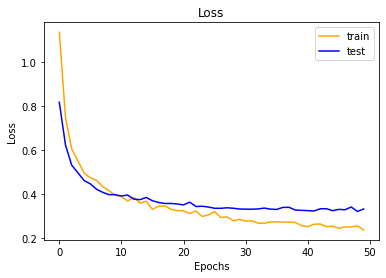

In [ ]:
plt.plot(history.history["accuracy"],c = "orange")
plt.plot(history.history["val_accuracy"],c = "blue")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

plt.plot(history.history["loss"],c = "orange")
plt.plot(history.history["val_loss"],c = "blue")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

#### MODELOS TIPO 2 | Modelo 3 + Generator (0.8783)

In [ ]:
model = Sequential([
    # base
    VGG16(input_shape=(200, 200, 3),include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=3, activation='softmax',name='preds'),   
])
model.layers[0].trainable= False
# show model summary

model.summary()

model.compile(
# Set the loss as binary_crossentropy
loss="categorical_crossentropy",
# Set the optimizer to Adam
optimizer=keras.optimizers.Adam(epsilon=0.01),
# Set the metric as accuracy
metrics=['accuracy']
)

datagen.fit(train_X_c)
history = model.fit_generator(datagen.flow(train_X_c,train_label_c, batch_size=batch_size),
                              epochs = epochs, validation_data = (valid_X_c, valid_label_c) ,steps_per_epoch = train_X_c.shape[0] // batch_size)
   

   
test_eval = model.evaluate(test_X_c, test_Y_one_hot_c, verbose=1)


58892288/58889256 [==============================] - 2s 0us/step
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 512)               0         
_________________________________________________________________
preds (Dense)                (None, 3)                 1539      
Total params: 14,716,227
Trainable params: 1,539
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
38/38 [==============================] - 22s 433ms/step - loss: 1.2462 - accuracy: 0.3350 - val_loss: 1.0851 - val_accuracy: 0.3876
Epoch 2/50
38/38 [==============================] - 7s 178ms/step - loss: 1.1060 - accuracy: 0.3561 - val_loss: 1.0619 - val_accuracy: 0.4160
Epoch 3/50
38/38 [==============================] - 7s 179ms/step - loss: 1.0814 - accuracy: 0.4063 - val_loss: 1.0404 - val_accuracy: 0.4419
Epoch 4/50
38/38 [==============================] - 7s 180ms/step - loss: 1.0482 - accuracy: 0.4302 - val_loss: 1.0050 - val_accuracy: 0.5685
Epoch 5/50
38/38 [==============================] - 7s 180ms/step - loss: 1.0210 - accuracy: 0.4782 - val_loss: 0.9839 - val_accuracy: 0.6253
Epoch 6/50
38/38 [==============================] - 7s 182ms/step - loss: 0.9887 - accuracy: 0.5110 - val_loss: 0.9578 - val_accuracy: 0.6899
Epoch 7/50
38/38 [==============================] - 7s 180ms/step - loss: 0.9592 - accuracy: 0.5537 - val_loss: 0.9355 - val_accuracy: 0.7209
Epoch

### SELECCIÓN DE MODELOS

Para los modelos tipo 1 se ha seleccionado el Modelo 1 + Generador

Para los modelos tipo 2 se ha seleccionado el Modelo 1 + Generador


## FUNCIÓN PARA LA PREDICCIÓN DE TUMORES CEREBRALES Y SU CLASIFICACIÓN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def pred_tumor(dir_imagen):
  imagen =[]
  resultado = ['Tumor : positivo. Tipo :Pituitaria', 'Tumor : positivo. Tipo : Glioma','Tumor : positivo. Tipo : Menglioma', 'Tumor: negativo' ]
  img_array = cv2.imread(dir_imagen)
  image = cv2.resize(img_array, (200,200))
  imagen.append(image)
  

  prediccion = ''
  #abrir la imagen y redimensionarla para el modelo
  
  
  X = np.array(imagen, dtype='float32')
  img = X/255.
  
  model1 = load_model('/content/drive/MyDrive/ML BRAIN TUMOR/MODELOS/Modelo_1_1_G.h5')
  Y_pred_sn = model1.predict(img, verbose=1)

  # introducción de la imagen en el Modelo 1| tumor si o no
  model1 = load_model('/content/drive/MyDrive/ML BRAIN TUMOR/MODELOS/Modelo_1_1_G.h5')
  Y_pred_sn = model1.predict(img, verbose=1)
  Y_pred = Y_pred_sn.round(3)
  if Y_pred>0.6:
    Y_pred[0]=1
    prediccion = resultado[3]
  else :
     Y_pred[0]=0


  # Si se ha detectado tumor se introduce la imagen en el Modelo 2| Clasificación del modelo
  if Y_pred[0] == 0:
    model2 = load_model('/content/drive/MyDrive/ML BRAIN TUMOR/MODELOS/Modelo_2_1_G.h5')
    Y_pred_sn = model2.predict(img, verbose=1)
    Y_pred = np.argmax(Y_pred_sn)
    prediccion = resultado[Y_pred]

  plt.imshow(image)
  plt.show()
  plt.axis("off")

  print('La predicción del modelo es:')
  print(prediccion)

In [ ]:
import os

1/1 [==============================] - 0s 82ms/step


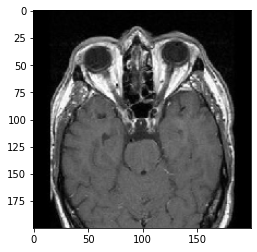

La predicción del modelo es:
Tumor : positivo. Tipo : Menglioma
* 1.jpg *
1/1 [==============================] - 1s 675ms/step


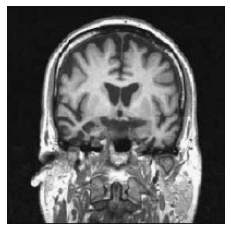

La predicción del modelo es:
Tumor: negativo
* image(312).jpg *
1/1 [==============================] - 1s 1s/step


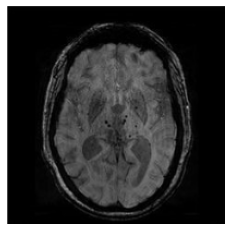

La predicción del modelo es:
Tumor: negativo
* image(22).jpg *
1/1 [==============================] - 0s 82ms/step


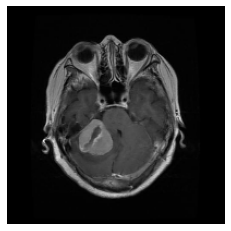

La predicción del modelo es:
Tumor : positivo. Tipo : Menglioma
* m (125).jpg *
1/1 [==============================] - 0s 73ms/step


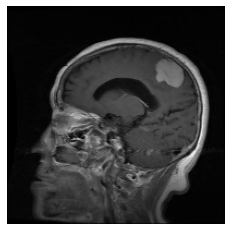

La predicción del modelo es:
Tumor : positivo. Tipo : Menglioma
* m3 (26).jpg *
1/1 [==============================] - 0s 91ms/step


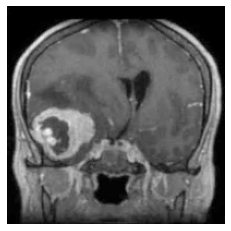

La predicción del modelo es:
Tumor : positivo. Tipo : Menglioma
* m1(172).jpg *
1/1 [==============================] - 0s 84ms/step


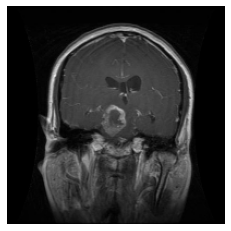

La predicción del modelo es:
Tumor : positivo. Tipo : Glioma
* gg (801).jpg *
1/1 [==============================] - 0s 81ms/step


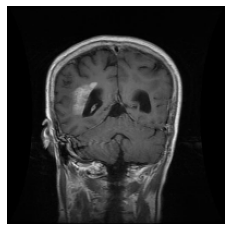

La predicción del modelo es:
Tumor : positivo. Tipo : Glioma
* gg (717).jpg *
1/1 [==============================] - 0s 97ms/step


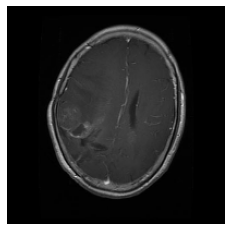

La predicción del modelo es:
Tumor : positivo. Tipo : Glioma
* gg (673).jpg *
1/1 [==============================] - 0s 75ms/step


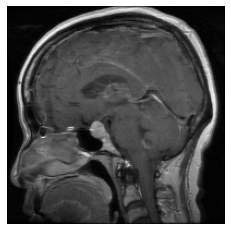

La predicción del modelo es:
Tumor : positivo. Tipo :Pituitaria
* p (576).jpg *
1/1 [==============================] - 0s 79ms/step


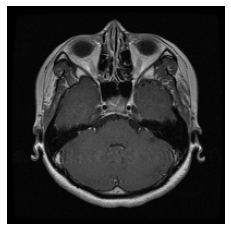

La predicción del modelo es:
Tumor : positivo. Tipo :Pituitaria
* p (548).jpg *
1/1 [==============================] - 0s 83ms/step


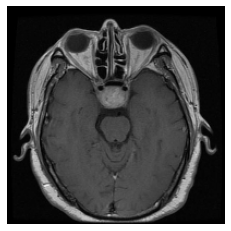

La predicción del modelo es:
Tumor : positivo. Tipo :Pituitaria
* p (729).jpg *


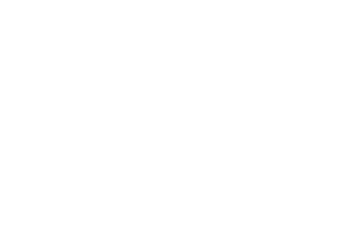

In [ ]:
dir_imagen = '/content/drive/MyDrive/ESPECIAL TEST'
contenido = os.listdir(dir_imagen)
for fichero in contenido:
    if os.path.isfile(os.path.join(dir_imagen, fichero)) and fichero.endswith('.jpg'): 
      pred_tumor(os.path.join(dir_imagen, fichero))
      print('*', fichero, '*')


